In [197]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [198]:
dir = '/media/xandao/c2f58d30-ff2c-47f7-95af-91ad6fd69760/resultados/br/novos/svm+512+vgg+rgb'

if not os.path.exists(dir):
    print('dir not found')

In [204]:
lst_dimension = []
lst_mean = []
lst_std = []
lst_threshold = []
lst_time = []
for p in sorted(pathlib.Path(dir).rglob('info.csv')):
    df = pd.read_csv(p, sep=';', index_col=0, header=None)
    if '512' in df.loc['dim_image', 1] and 'vgg16' in df.loc['extractor', 1]:  # and '512' in df.loc['data_n_features', 1]:
        dir_input = df.loc['dir_input', 1]
        if any(t for t in dir_input.split('/') if t == '5' and len(t) == 1):
            threshold = 5
        elif any(t for t in dir_input.split('/') if t == '10' and len(t) == 2):
            threshold = 10
        elif any(t for t in dir_input.split('/') if t == '20' and len(t) == 2):
            threshold = 20
        else:
            threshold = -1
        # print(threshold, dir_input)
        dimension = df.loc['data_n_features', 1]
        path_to_mean = str(p).replace('info.csv', 'mean.csv')
        df_mean = pd.read_csv(path_to_mean, sep=';', index_col=0, header=None)

        if threshold == 20:
            time = float(df_mean.loc['mean_time_train_valid', 1] + df_mean.loc['mean_time_search_best_params', 1])
            lst_time.append(time)
            lst_dimension.append(dimension)

        if '512' in df.loc['data_n_features', 1]:
            path_mean = str(p).replace('info.csv', 'mean.csv')
            df_mean = pd.read_csv(path_mean, sep=';', index_col=0, header=None)
            mean = df_mean.loc['mean_f1_sum', 1]
            std = df_mean.loc['std_f1_sum', 1]
            lst_threshold.append(threshold)
            lst_mean.append(mean)
            lst_std.append(std)
# lst_dimension
lst_mean

[0.3680210591708664, 0.4221329322513512]

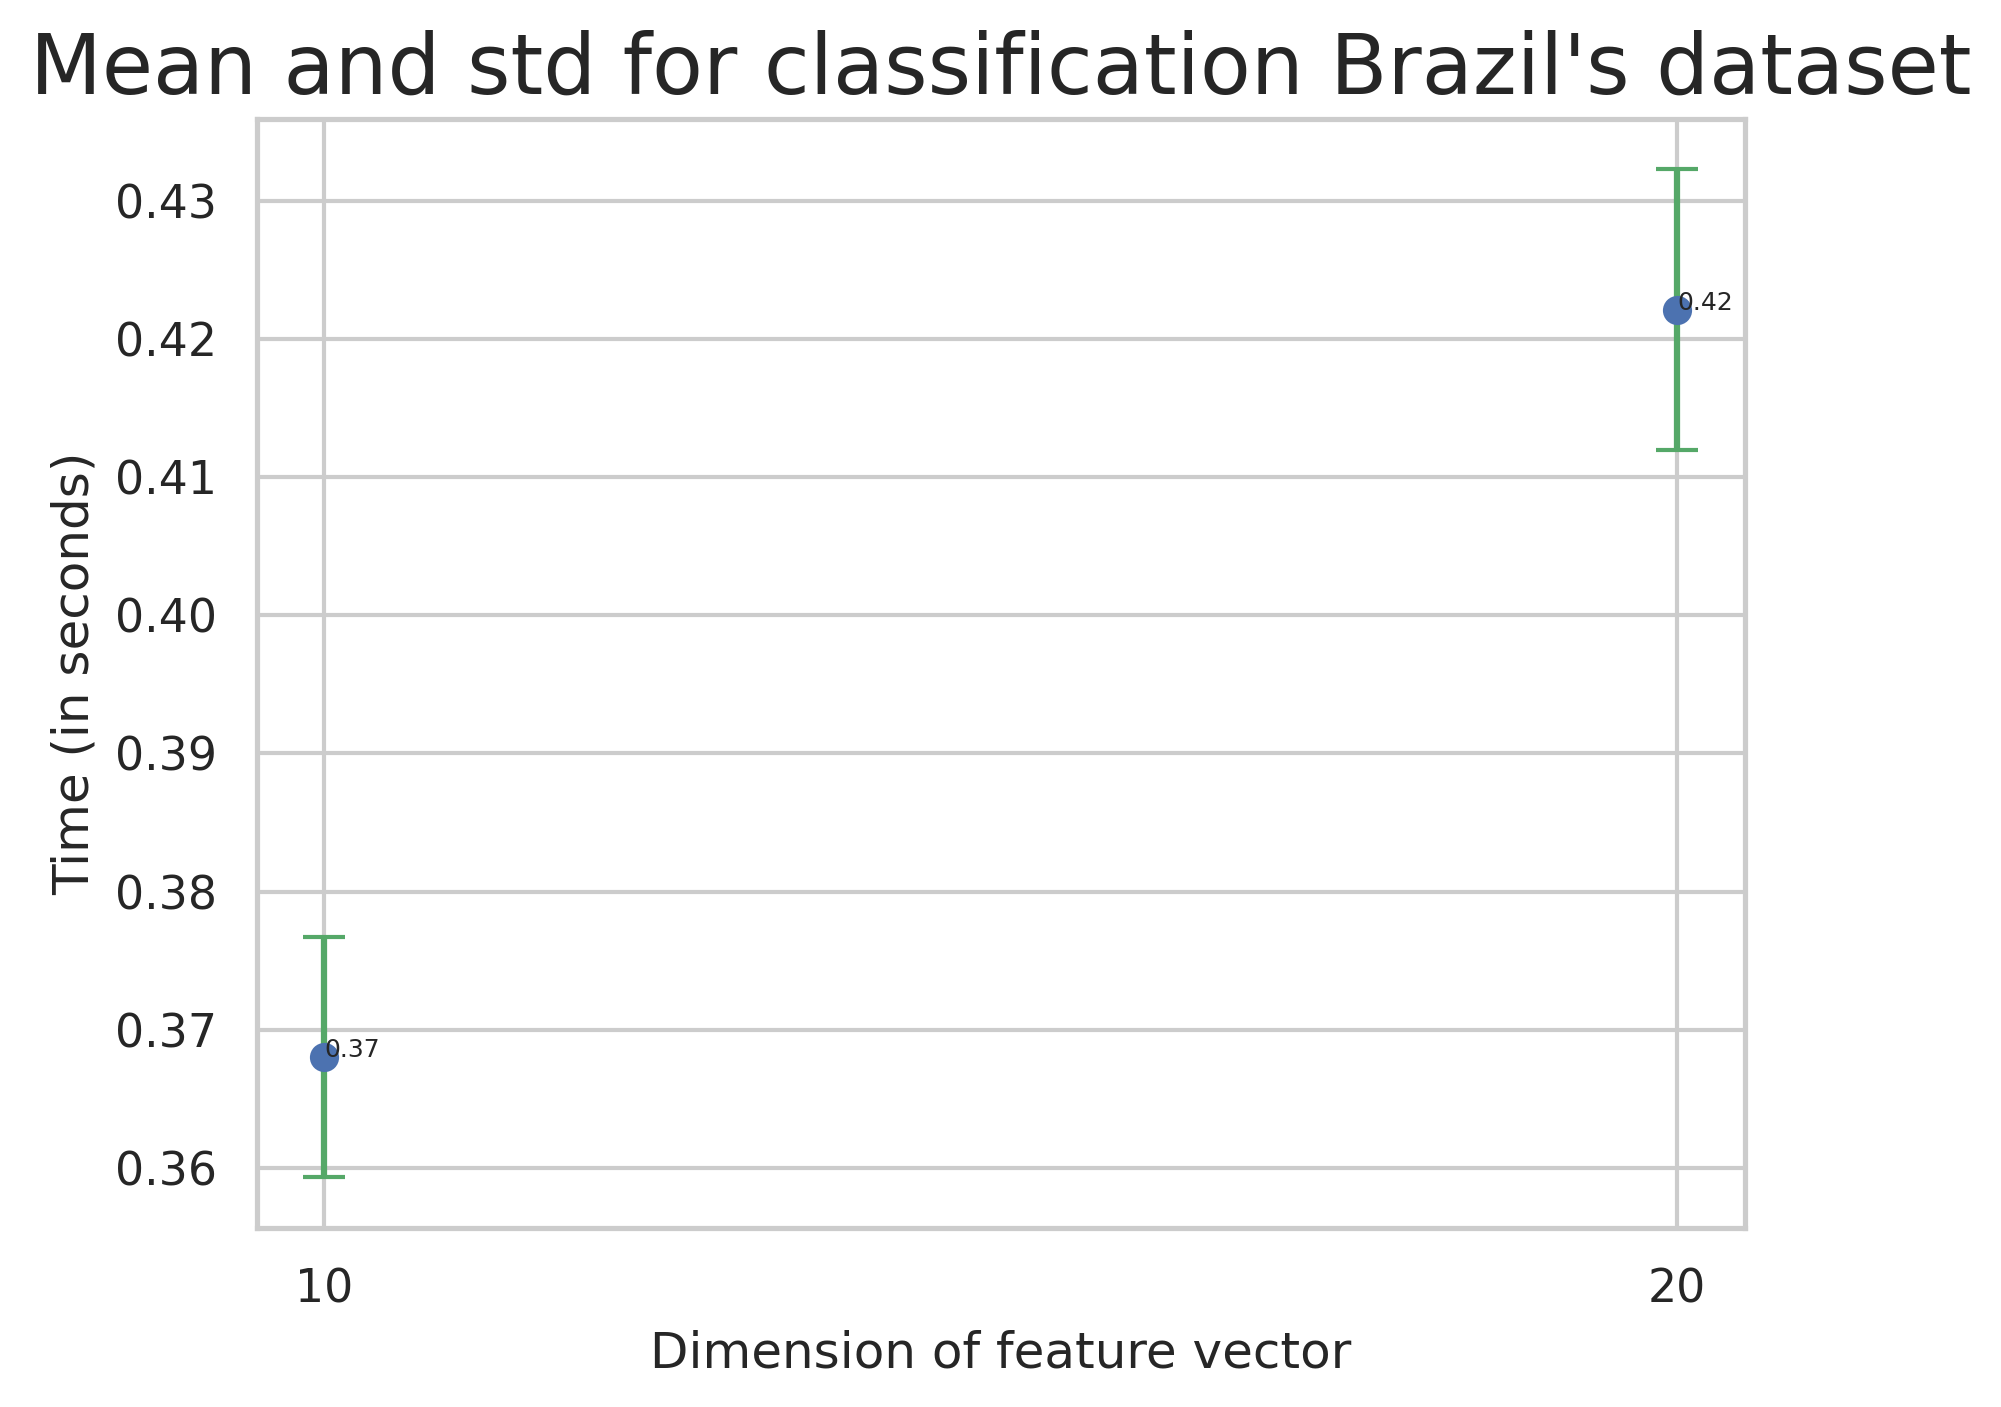

In [216]:
x = np.arange(len(lst_threshold))
y = np.array(lst_mean)

# yerr = np.linspace(0.05, 0.2, 2)

# colors = ['#1b9e77', '#a9f971', '#fdaa48']
fig, ax = plt.subplots(dpi=300)
# y = np.array()

ax.errorbar(x, y, yerr=np.array(lst_std), fmt='ob',  capsize=5,  ecolor="g")
ax.set_title('Mean and std for classification Brazil\'s dataset', fontsize=20)
ax.set_xlabel('Dimension of feature vector')
ax.set_ylabel('Time (in seconds)')

for i in range(len(x)):
    plt.text(i, y[i], np.round(y[i], 2), fontsize=6)

plt.xticks(x, lst_threshold)
plt.show()
fig.savefig('chart_time_br.png', bbox_inches='tight', pad_inches=0)

['128', '256', '512']


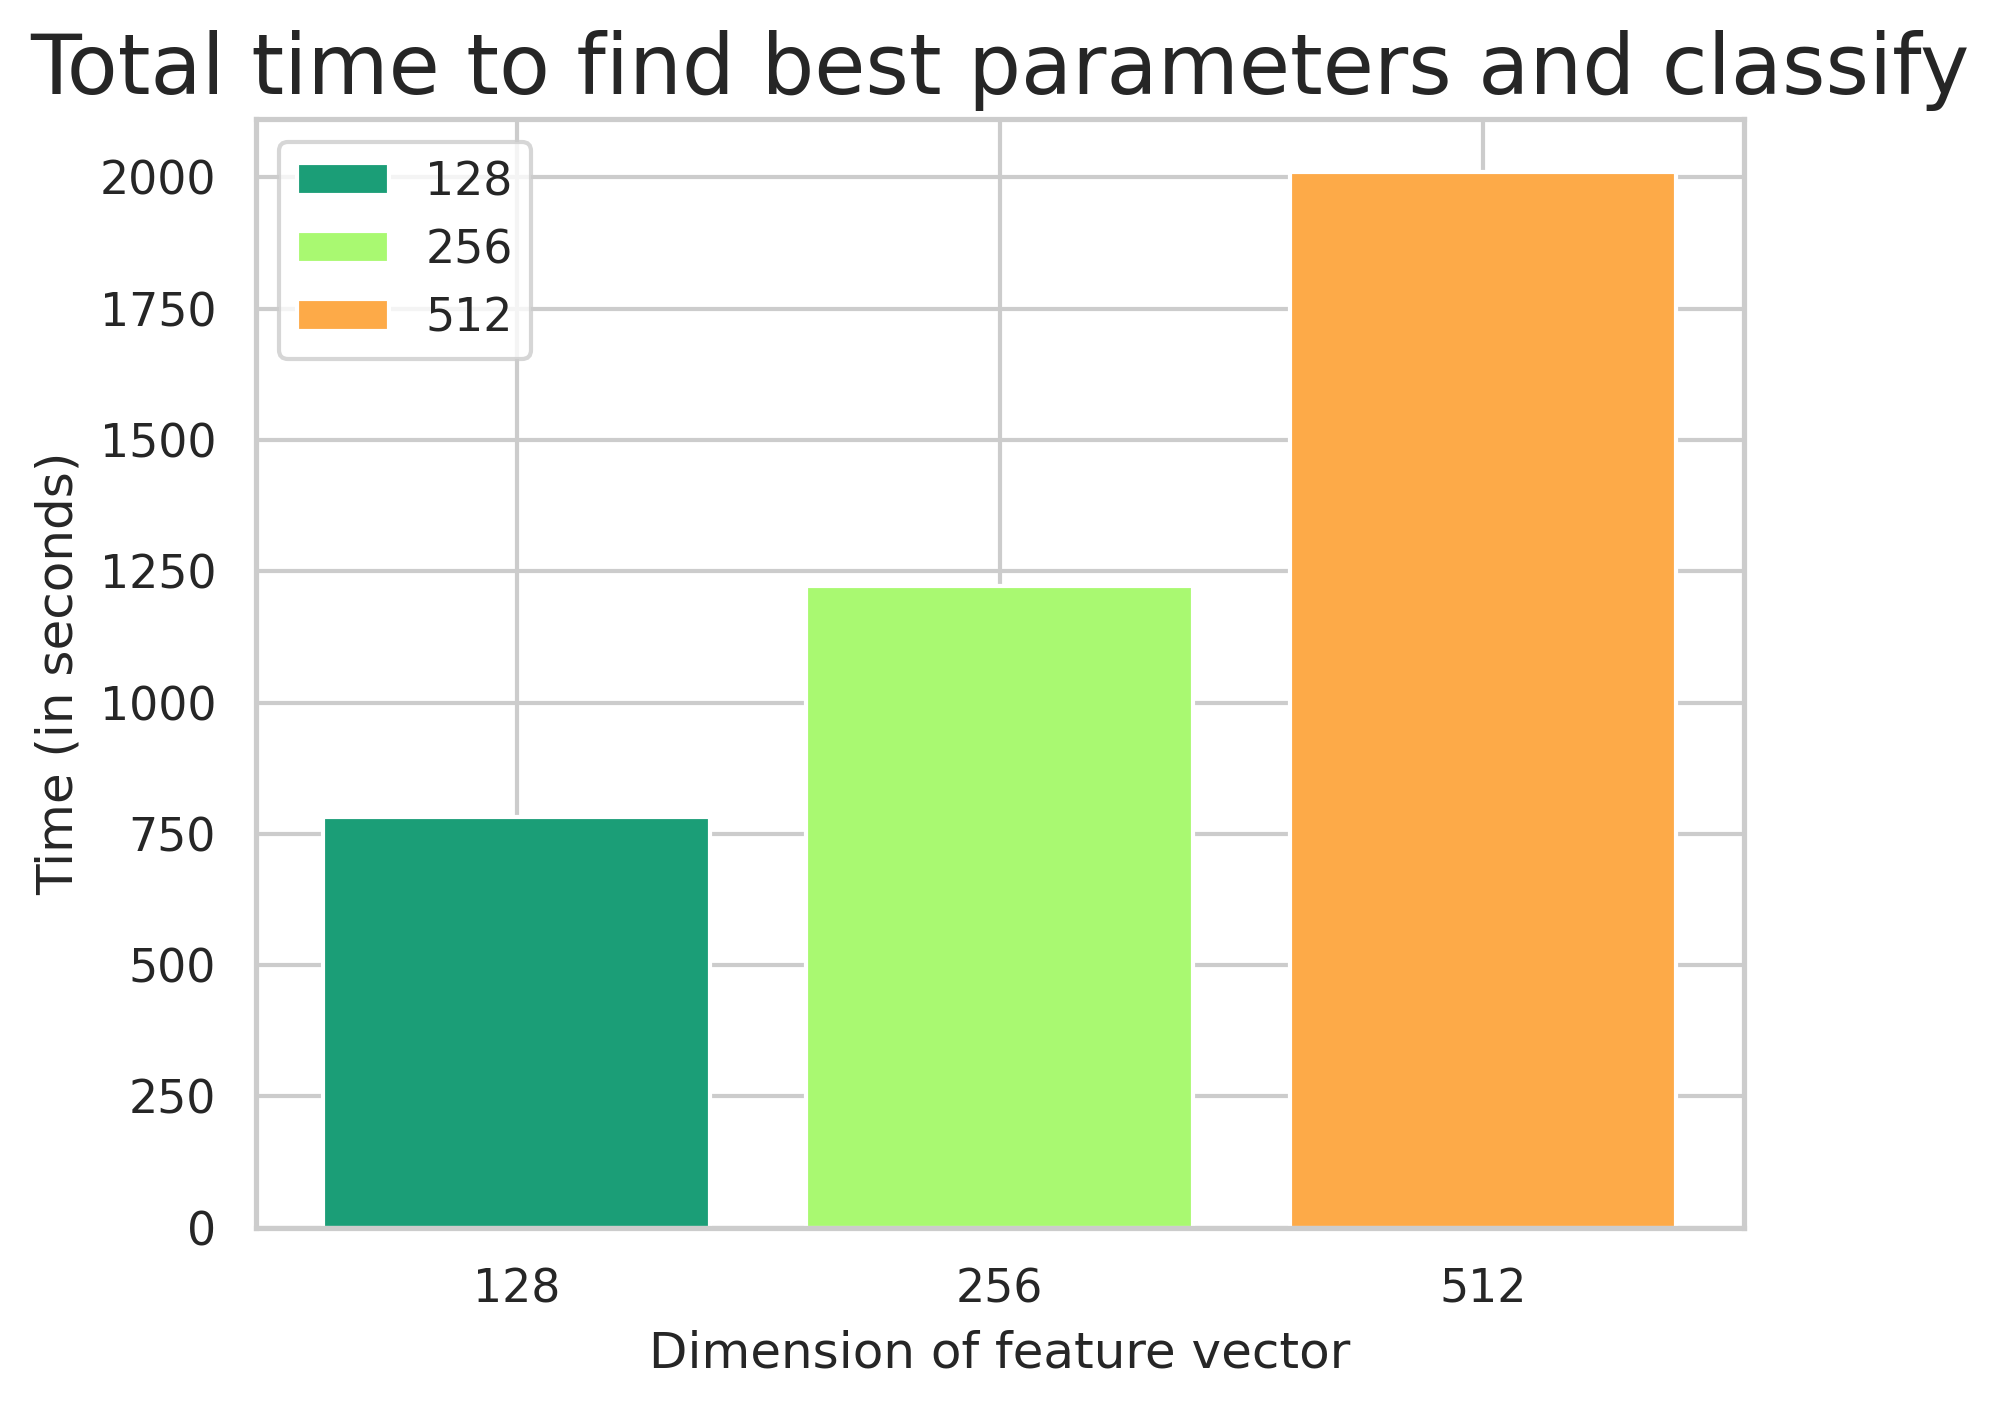

In [170]:
x = np.arange(len(lst_dimension))
y = np.array(lst_time)

fig, ax = plt.subplots( dpi=300)

ax.set_title('Total time to find best parameters and classify', fontsize=20)
ax.set_xlabel('Dimension of feature vector')
ax.set_ylabel('Time (in seconds)')

colors = ['#1b9e77', '#a9f971', '#fdaa48']
plt.bar(x, y, color=colors, label=lst_dimension)
plt.xticks(x, lst_dimension)
print(lst_dimension)
plt.legend()
fig.savefig('chart_time_br.png', bbox_inches='tight', pad_inches=0)